Ma LOTR adatokat fogunk megcsamcsogni. Kezdesnek ugyanugy berantjuk a pandas-t, ezen kivul lesz, amikor direktben matplotlibbel plotolunk, ugyhogy egy korben importaljuk azt is a szokasos modon:

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Movies

Elso korben a [Movies.csv](Movies.csv)-t nezzuk meg:

In [20]:
movies = pd.read_csv("Movies.csv")
movies

,Name,RuntimeInMinutes,BudgetInMillions,BoxOfficeRevenueInMillions,AcademyAwardNominations,AcademyAwardWins,RottenTomatoesScore
0,The Lord of the Rings Series,558,281,2917.0,30,17,94.000000
1,The Fellowship of the Ring,178,93,871.5,13,4,91.000000
2,The Two Towers,179,94,926.0,6,2,96.000000
3,The Return of the King,201,94,1120.0,11,11,95.000000
4,The Hobbit Series,462,675,2932.0,7,1,66.333333
5,The Unexpected Journey,169,200,1021.0,3,1,64.000000
6,The Desolation of Smaug,161,217,958.4,3,0,75.000000
7,The Battle of the Five Armies,144,250,956.0,1,0,60.000000


Csinaljunk egy bar plotot, hogy lassuk, melyik film mennyi ideig tartott.

<AxesSubplot:xlabel='Name'>

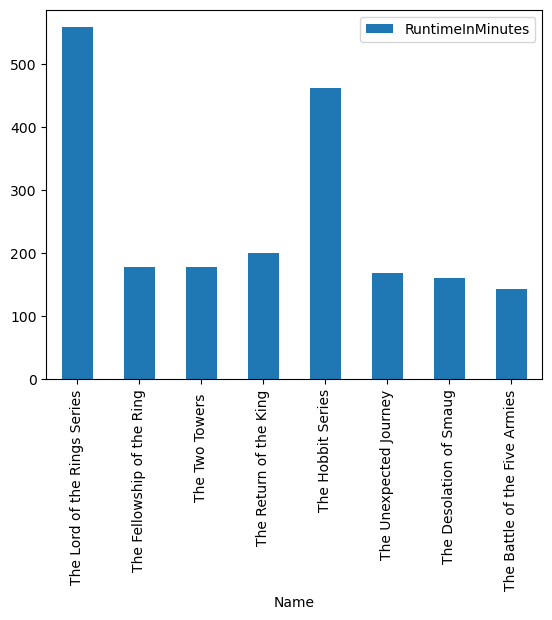

In [8]:
movies.plot(x="Name", y="RuntimeInMinutes", kind="bar")

A Pandas olyan, hogy ugyanazt tobbfelekeppen is meg lehet csinalni, a fentire egy "shorthand" a kovetkezo:

<AxesSubplot:xlabel='Name'>

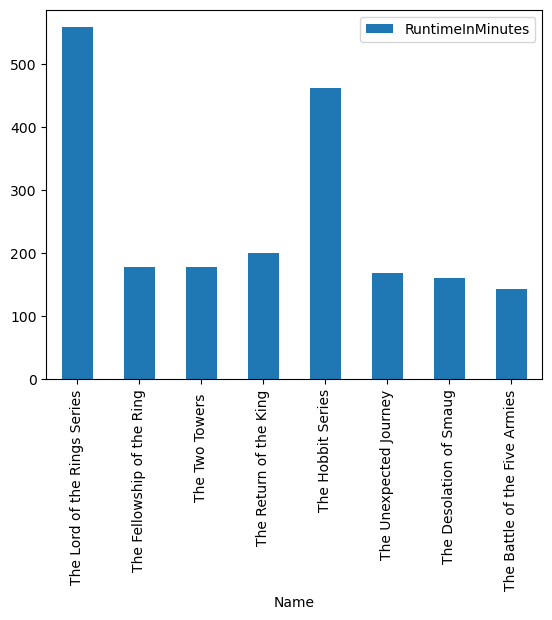

In [9]:
movies.plot.bar(x="Name", y="RuntimeInMinutes")

De direktben hasznalhatjuk a `matplotlib`-et is:

<BarContainer object of 8 artists>

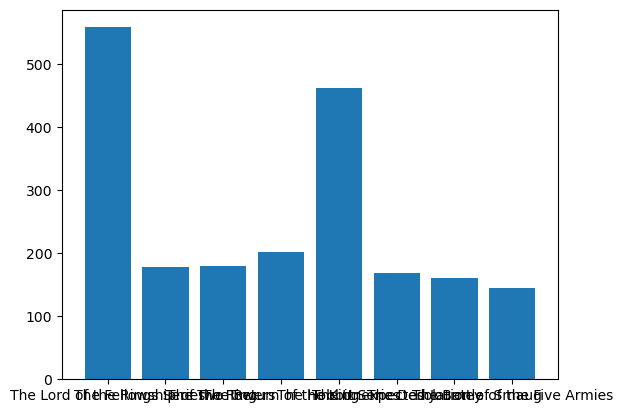

In [13]:
plt.bar(x=movies["Name"], height=movies["RuntimeInMinutes"])

Es mivel a `DataFrame`-ek oszlopait `movies["Name"]` es `movies.Name` formaban is elerhetjuk, ez utobbit lehet akar igy is hasznalni:

<BarContainer object of 8 artists>

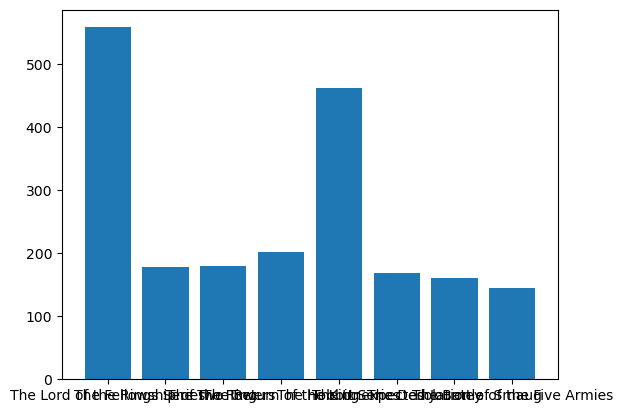

In [14]:
plt.bar(x=movies.Name, height=movies.RuntimeInMinutes)

Ez utobbi elonyos, ha rovid, szokoz nelkuli oszlopneveink vannak, amik nem utkoznek mas beepitett dologgal (pl `dropna`). Hogy kinek melyik megoldas tetszik a legjobban, egyeni preferencia kerdese. Mukodjon (helyesen). Itt most osszevissza lesz mindegyik.

Hogy meg egy kis raadas legyen: az `y` argumentum "kotelezo" (valojaban nem, lasd lentebb), az adja meg, hogy melyik oszlopbol nezzze a magassagaokat plotolaskor. Az `x` az x tengelyre irando cimkeket tartalmazza. Ha nem adjuk meg, akkor alapertelmezetten a `DataFrame` indexe. Ez a fenti beolvasas eseten automatikusan egy 0-tol indulo autoincrement azonosito, ahogy az alabbi ploton is latszik:

<AxesSubplot:>

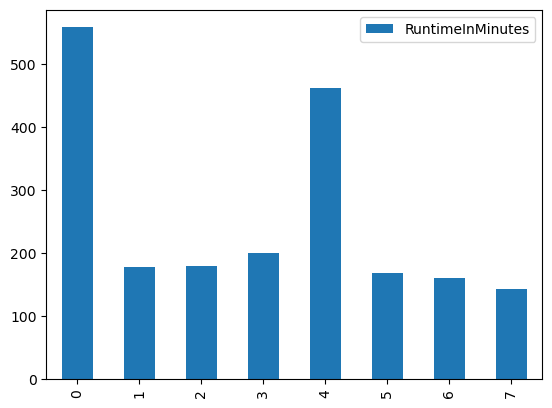

In [15]:
movies.plot.bar(y="RuntimeInMinutes")

De megadhatjuk, hogy mostantol valamelyik oszlop legyen az index (~kulcs dictionary-ben):

In [21]:
movies.set_index('Name', inplace=True)
movies

,RuntimeInMinutes,BudgetInMillions,BoxOfficeRevenueInMillions,AcademyAwardNominations,AcademyAwardWins,RottenTomatoesScore
Name,,,,,,
The Lord of the Rings Series,558,281,2917.0,30,17,94.000000
The Fellowship of the Ring,178,93,871.5,13,4,91.000000
The Two Towers,179,94,926.0,6,2,96.000000
The Return of the King,201,94,1120.0,11,11,95.000000
The Hobbit Series,462,675,2932.0,7,1,66.333333
The Unexpected Journey,169,200,1021.0,3,1,64.000000
The Desolation of Smaug,161,217,958.4,3,0,75.000000
The Battle of the Five Armies,144,250,956.0,1,0,60.000000


Fontos, hogy ezt csak egyszer tehetjuk meg, masodjara mar nem fogja megtalalni a Names oszlopot, hiszen index lett belole. Hogy milyen oszlopcimkeink vannak, es milyen index ertekek, azokat az alabbiakkal meg tudjuk nezni:

In [22]:
movies.columns

Index(['RuntimeInMinutes', 'BudgetInMillions', 'BoxOfficeRevenueInMillions',
       'AcademyAwardNominations', 'AcademyAwardWins', 'RottenTomatoesScore'],
      dtype='object')

In [23]:
movies.index

Index(['The Lord of the Rings Series', 'The Fellowship of the Ring',
       'The Two Towers ', 'The Return of the King', 'The Hobbit Series',
       'The Unexpected Journey', 'The Desolation of Smaug',
       'The Battle of the Five Armies'],
      dtype='object', name='Name')

Node, most hogy mar a filmek nevei az indexek, az automatikus `x` cimkek ezek lesznek plotolaskor, igy eleg ez:

<AxesSubplot:xlabel='Name'>

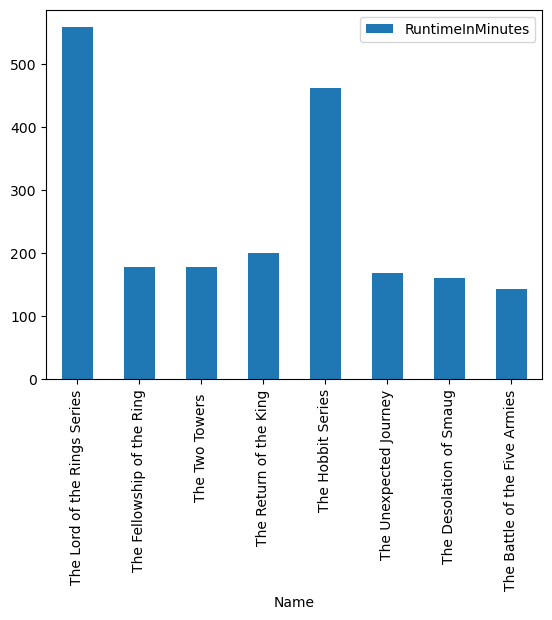

In [24]:
movies.plot(y="RuntimeInMinutes", kind="bar")

Es mivel ez tul keves modja ugyanannak a diagramnak a kirajzolasanak, valojaban az `y` megadasa nelkul is meg lehet hivni a plotolast:

<AxesSubplot:xlabel='Name'>

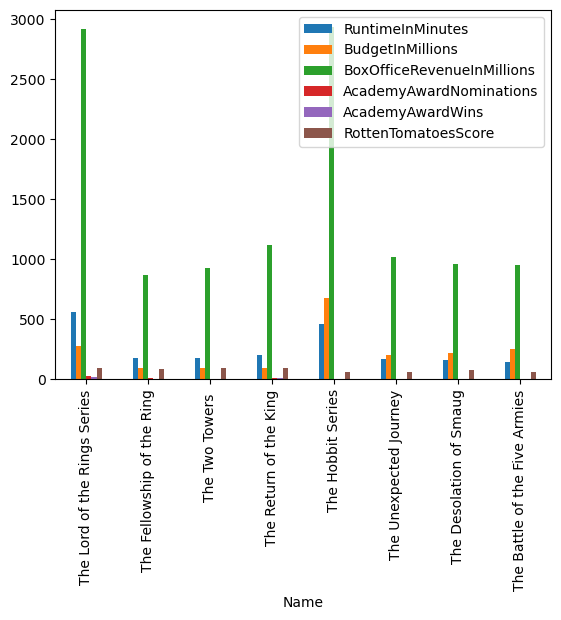

In [33]:
movies.plot.bar()

Latjuk, hogy ilyenkor az osszes oszlopot kulon-kulon adatsorkent plotolja. Szoval ha mi csak a `"RuntimeInMinutes"` oszlopot szeretnenk, akkor az oszlopszures utan meghivva `y` nelkul a plotolast egy n+1. modon is meg tudtuk ugyanazt csinalni:

<AxesSubplot:xlabel='Name'>

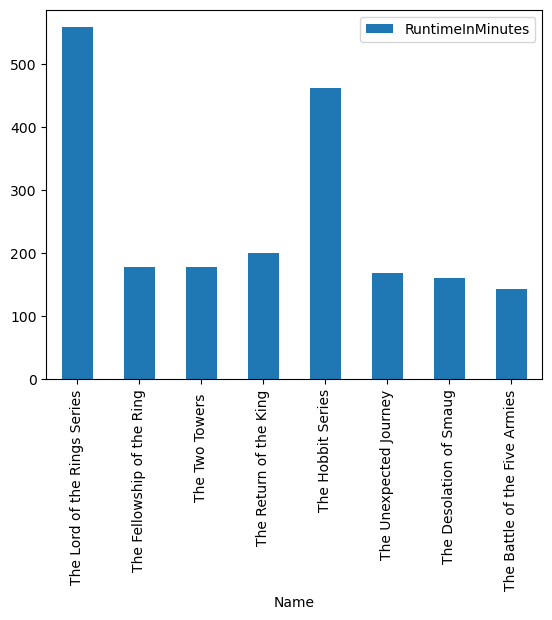

In [32]:
movies[["RuntimeInMinutes"]].plot.bar()

Az plotot nezve hamar feltunik, hogy valami nincs teljesen rendben, maga a trilogia hossz is ott van egyben, ami nekunk nem kell. Szurjuk le a dolgot csak a filmekre. Ezt most ranezesre konnyen megtehetjuk, ami 300 percnel tobb az trilogia, ami kevesebb az film:

In [25]:
justmovies = movies[ movies.RuntimeInMinutes < 300]
justmovies

,RuntimeInMinutes,BudgetInMillions,BoxOfficeRevenueInMillions,AcademyAwardNominations,AcademyAwardWins,RottenTomatoesScore
Name,,,,,,
The Fellowship of the Ring,178,93,871.5,13,4,91.0
The Two Towers,179,94,926.0,6,2,96.0
The Return of the King,201,94,1120.0,11,11,95.0
The Unexpected Journey,169,200,1021.0,3,1,64.0
The Desolation of Smaug,161,217,958.4,3,0,75.0
The Battle of the Five Armies,144,250,956.0,1,0,60.0


Maris jobb, akkor erre dobjunk ra egy barplotot:

<AxesSubplot:xlabel='Name'>

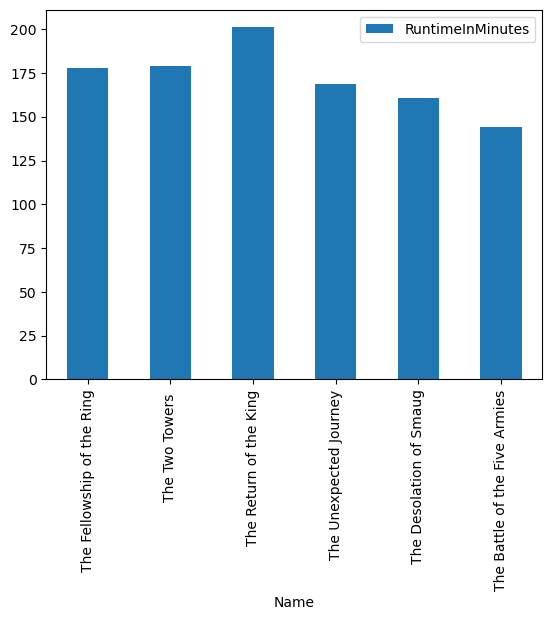

In [26]:
justmovies.plot.bar(y="RuntimeInMinutes")

Csinaljunk egy hasonlot az dijakra:

<AxesSubplot:xlabel='Name'>

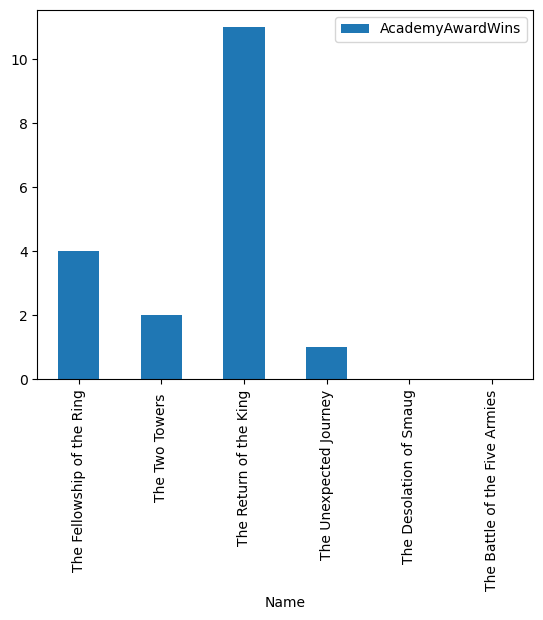

In [36]:
justmovies.plot.bar(y=["AcademyAwardWins"])

De milyen jo lenne latni, hogy mennyibol kaptak ennyit. Ezt a fenti oszlopszureses modon mar sejtjuk, hogy igy meg lehet csinalni:

<AxesSubplot:xlabel='Name'>

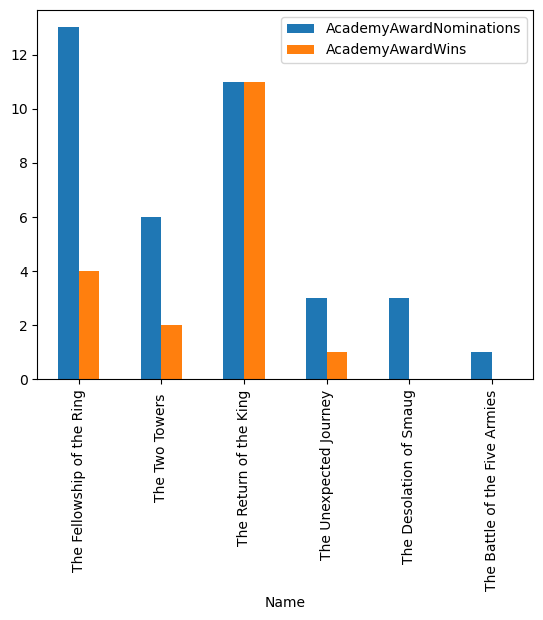

In [38]:
justmovies[["AcademyAwardNominations", "AcademyAwardWins"]].plot.bar()

De termeszetesen mukodik a tobbi modon is, pl:

<AxesSubplot:xlabel='Name'>

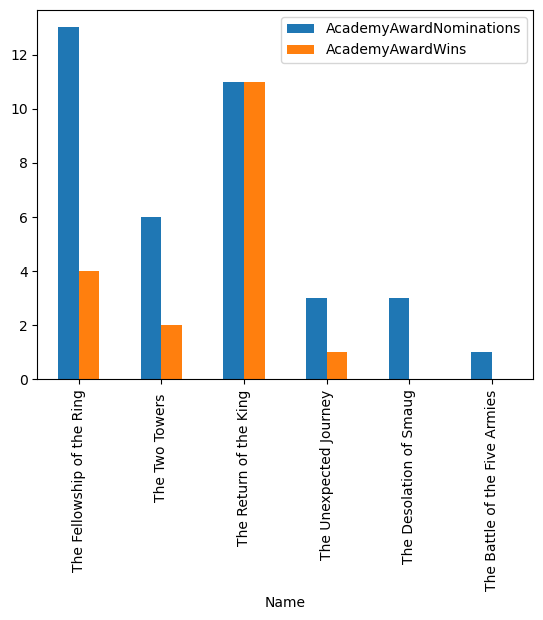

In [42]:
justmovies.plot(y=["AcademyAwardNominations", "AcademyAwardWins"], kind="bar")

# Characters

Masodkorben nezzuk meg, mi van a [Characters.csv](Characters.csv)-ben

In [44]:
characters = pd.read_csv("Characters.csv")
characters

,Name,Url,Race
0,Adanel,http://lotr.wikia.com//wiki/Adanel,Human
1,Adrahil I,http://lotr.wikia.com//wiki/Adrahil_I,Human
2,Adrahil II,http://lotr.wikia.com//wiki/Adrahil_II,Human
3,Aegnor,http://lotr.wikia.com//wiki/Aegnor,Elf
4,Aerin,http://lotr.wikia.com//wiki/Aerin,Human
...,...,...,...
752,Myrtle Burrows,http://lotr.wikia.com//wiki/Myrtle_Burrows,Hobbit
753,Thingol,http://lotr.wikia.com//wiki/Thingol,Elf
754,Théodwyn,http://lotr.wikia.com//wiki/Th%C3%A9odwyn,Human
755,Eärendil,http://lotr.wikia.com//wiki/E%C3%A4rendil,Human


Ez is egy olyan tabla, ahol logikus volna a `"Name"`-nek lenni az indexnek. A `set_index` helyett ezt mar beolvasaskor megadhatjuk:

In [47]:
characters = pd.read_csv("Characters.csv", index_col="Name")
characters

,Url,Race
Name,,
Adanel,http://lotr.wikia.com//wiki/Adanel,Human
Adrahil I,http://lotr.wikia.com//wiki/Adrahil_I,Human
Adrahil II,http://lotr.wikia.com//wiki/Adrahil_II,Human
Aegnor,http://lotr.wikia.com//wiki/Aegnor,Elf
Aerin,http://lotr.wikia.com//wiki/Aerin,Human
...,...,...
Myrtle Burrows,http://lotr.wikia.com//wiki/Myrtle_Burrows,Hobbit
Thingol,http://lotr.wikia.com//wiki/Thingol,Elf
Théodwyn,http://lotr.wikia.com//wiki/Th%C3%A9odwyn,Human


Erdekes lenne megnezni, hany elf, ember, torpe, stb fordul elo. Elso korben jo volna latni, mik az unikalis ertekek a Race oszlopban:

In [49]:
characters["Race"].unique()

array(['Human', 'Elf', 'Dwarf', 'Hobbit', 'Maiar'], dtype=object)

Vagy ugye a masik jelolessel (ezuttal mar valtozohoz hozza is rendelve az eredmenyt:)

In [51]:
races = characters.Race.unique()
races

array(['Human', 'Elf', 'Dwarf', 'Hobbit', 'Maiar'], dtype=object)

Szoval vannak emberek, elfek, torpek, hobbitok, es... mi a nyavaja az a Maiar?! Szurjuk le a tablat, hogy kideruljon, kik azok:

In [54]:
characters[ characters.Race == "Maiar" ]

,Url,Race
Name,,
Radagast,http://lotr.wikia.com//wiki/Radagast,Maiar
Gandalf,http://lotr.wikia.com//wiki/Gandalf,Maiar
Saruman,http://lotr.wikia.com//wiki/Saruman,Maiar
Tilion,http://lotr.wikia.com//wiki/Tilion,Maiar
Sauron,http://lotr.wikia.com//wiki/Sauron,Maiar
Eönwë,http://lotr.wikia.com//wiki/E%C3%B6nw%C3%AB,Maiar
Durin's Bane,http://lotr.wikia.com//wiki/Durin%27s_Bane,Maiar
Alatar,http://lotr.wikia.com//wiki/Alatar,Maiar
Pallando,http://lotr.wikia.com//wiki/Pallando,Maiar


Minden vilagos. Most mondjuk szamoljuk meg, hany ember van. Eddigi eszkozeinkkel ezt meg tudjuk tenni ugy, hogy leszurunk sorokra, majd vesszuk a hosszat:

In [55]:
len(characters[ characters.Race == "Human" ])

387

Az eddigio tudasunkbol mar akkor ossze tudunk legozni egy bar plotot ugy, hogy csinalunk egy dictionary-t, amiben osszeszamoljuk, hogy melyik faj hanyszor fordul elo:

In [58]:
count_races = {}
for race in races:
    count_races[race] = len( characters[ characters.Race == race ] )
count_races

{'Human': 387, 'Elf': 97, 'Dwarf': 47, 'Hobbit': 215, 'Maiar': 11}

Ezek utan a szokott modon `plt`-vel csinalhatunk bar plotot:

<BarContainer object of 5 artists>

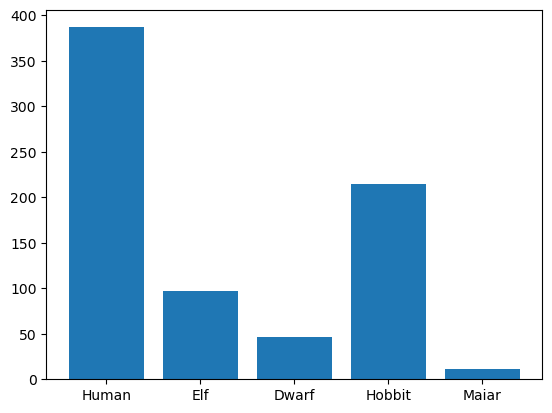

In [59]:
plt.bar(x=count_races.keys(), height=count_races.values())

De ha mar `Dataframe`-eket tanulunk, dictionary helyett akar lehetne hasznalni azt is:

In [61]:
race_count_df = pd.DataFrame(index=races)
race_count_df

""
Human
Elf
Dwarf
Hobbit
Maiar


Ebben most meg csak az indexek vannak benne, oszlop nincs, hat csinaljuk meg:

In [63]:
race_count_df["count"] = [ len(characters[ characters.Race == race ]) for race in race_count_df.index]
race_count_df

,count
Human,387
Elf,97
Dwarf,47
Hobbit,215
Maiar,11


Eeees akkor mar csak plotolni kell:

<AxesSubplot:>

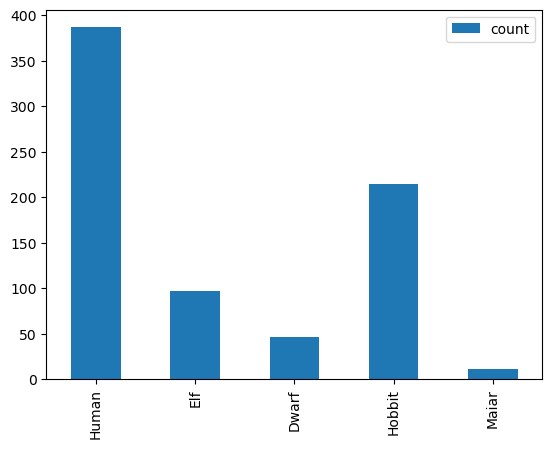

In [64]:
race_count_df.plot.bar()

Nem tul szep, (`.map`-el lehetne meg szepiteni, de azt most elkeruljuk). Viszont ez meg gyanusan csak ket kulonbozo mod ugyanarra...

In [66]:
characters.Race.value_counts()

Human     387
Hobbit    215
Elf        97
Dwarf      47
Maiar      11
Name: Race, dtype: int64

Igen, egy sorbol meg lehet kapni egy olyan `Series`-t, ami pontosan azt tartalmazza, amit szertnenk, amire lehet plotolni...

<AxesSubplot:>

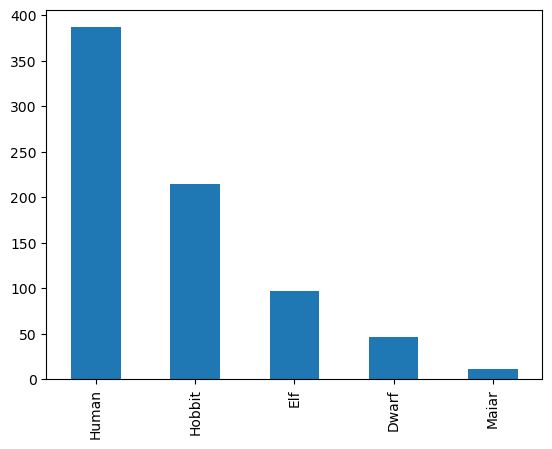

In [67]:
characters.Race.value_counts().plot.bar()

A sorrend itt csokkeno, de egyebkent ugyanaz. Node ez meg mindig csak 3 mod... Van egy `groupby` fuggvenye a `DataFrame`-eknek, ami "csoportosit" egy adott oszlopban az azonos ertekek alapjan:

In [69]:
race_groups = characters.groupby("Race")
race_groups

Ebbol igy sok nem latszik, de egy `for` ciklussal be lehet jarni:

In [73]:
for group,data in race_groups:
    print(group, data)

Dwarf                                                                                  Url  \
Name                                                                                   
Azaghâl                                     http://lotr.wikia.com//wiki/Azagh%C3%A2l   
Balin                                              http://lotr.wikia.com//wiki/Balin   
Bifur                                              http://lotr.wikia.com//wiki/Bifur   
Bofur                                              http://lotr.wikia.com//wiki/Bofur   
Bombur                                            http://lotr.wikia.com//wiki/Bombur   
Borin                                              http://lotr.wikia.com//wiki/Borin   
User:Deathshriek                        http://lotr.wikia.com//wiki/User:Deathshriek   
Dori                                                http://lotr.wikia.com//wiki/Dori   
Durin VII                                      http://lotr.wikia.com//wiki/Durin_VII   
Dwalin                    

Mivel tul sok sor van, ezert igy sok minden nem latszodik, de egy `.head()` segit itt.

In [74]:
for group,data in race_groups:
    print(group, data.head())

Dwarf                                               Url   Race
Name                                                    
Azaghâl  http://lotr.wikia.com//wiki/Azagh%C3%A2l  Dwarf
Balin           http://lotr.wikia.com//wiki/Balin  Dwarf
Bifur           http://lotr.wikia.com//wiki/Bifur  Dwarf
Bofur           http://lotr.wikia.com//wiki/Bofur  Dwarf
Bombur         http://lotr.wikia.com//wiki/Bombur  Dwarf
Elf                                             Url Race
Name                                                
Aegnor       http://lotr.wikia.com//wiki/Aegnor  Elf
Amarië  http://lotr.wikia.com//wiki/Amari%C3%AB  Elf
Amdír    http://lotr.wikia.com//wiki/Amd%C3%ADr  Elf
Amras         http://lotr.wikia.com//wiki/Amras  Elf
Amrod         http://lotr.wikia.com//wiki/Amrod  Elf
Hobbit                                                                          Url  \
Name                                                                           
Angelica Baggins                http://lotr.wikia.com

Jol latszik, hogy az egyes fajok szerint "szetszedte" a sorokat. EGy ilyen "csoportositasbol" tudunk csinalni egy `DataFrame`-et ugy, hogy megmondjuk, miszerint "redukalja" az egyes resztablakat. Itt egy sima `count` tokeletes nekunk:

In [76]:
race_count_df2 = race_groups.count()
race_count_df2

,Url
Race,
Dwarf,47
Elf,97
Hobbit,215
Human,387
Maiar,11


Innet mar ismet plotolhatunk, ahogy kedvunk tartja.